# ----------------- Multiple  Linear Regression--------------------------------

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
diabetes = load_diabetes()

In [4]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [7]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [8]:
df['target'] = diabetes.target

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [10]:
X = df.iloc[:,0:-1]
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [11]:
y = df.iloc[:,-1]
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [12]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(353, 10)

In [13]:
y_train.shape

(353,)

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
lr.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [16]:
lr.intercept_

np.float64(151.34560453985995)

In [17]:
y_predict = lr.predict(X_test)


## Error Calulation

In [18]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean squared Error: {mse}")
print(f"Root Mean squared Error: {mse}")

Mean Absolute Error: 42.79409467959994
Mean squared Error: 2900.1936284934814
Root Mean squared Error: 2900.1936284934814


## Accuracy

In [19]:
## Adjusted R2 score 
r2 = r2_score(y_test, y_predict)
print(f"R2 score - {r2}")
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R2 - {adjusted_r2}")

R2 score - 0.4526027629719195
Adjusted R2 - 0.38242363001960145


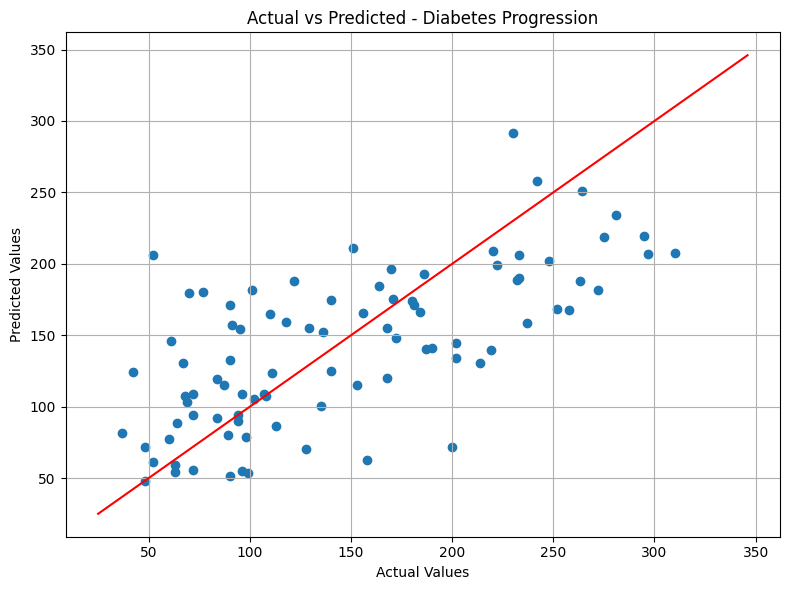

In [20]:
# 7. Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Diabetes Progression")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # reference line

plt.grid(True)
plt.tight_layout()
plt.show()


### -------------- Appling Gradient and Desent -----------------

In [21]:
from  sklearn.preprocessing  import StandardScaler

In [22]:
# Featuring scaling 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### ************************* Batch Gradient Desent ********************************************
- max_iter=1000 (Epoch)  [If convergence is achieved earlier (loss change < Tolerance(tol)), training stops before 1000 iterations. )]
- learning_rate='invscaling' [Decreases with time]
- eta0=0.01
- random_state=42 [Ensures reproducibility of results by controlling randomness (e.g., weight initialization, shuffling)].
- .fit() [For Batch GD (Use Whole Data set)]

In [23]:
from sklearn.linear_model import SGDRegressor

batch_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01,random_state=42)
batch_model.fit(X_train,y_train)
R2_score = batch_model.score(X_test,y_test)
print("[Batch GD] R² Score:", R2_score)

[Batch GD] R² Score: 0.44689495075388763


In [24]:
y_predict = batch_model.predict(X_test)

In [25]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"[Batch GD] Mean Absolute Error: {mae}")
print(f"[Batch GD] Mean squared Error: {mse}")
print(f"[Batch GD] Root Mean squared Error: {mse}")

[Batch GD] Mean Absolute Error: 43.30122663178642
[Batch GD] Mean squared Error: 2930.4344837766507
[Batch GD] Root Mean squared Error: 2930.4344837766507


##### ************************ Stochastic Gradient Decent ****************************************
- max_iter=1000 (Epoch)  [If convergence is achieved earlier (loss change < Tolerance(tol)), training stops before 1000 iterations. ]
- warm_start = f True, reuse the solution of the previous fit to continue training
- learning_rate='invscaling' [Decreases with time]
- eta0=0.01
- random_state=42 [Ensures reproducibility of results by controlling randomness (e.g., weight initialization, shuffling)].
- .partial_fit() sample-by-sample

In [39]:
sgd_model = SGDRegressor(max_iter=1, learning_rate='invscaling', eta0=0.01, warm_start=True, random_state=42)
print(sgd_model)
epoch = 10

for e in range(epoch): ## itterating through each epoch
    for i in range (X_train.shape[0]): ## Itteration through each data point
        xi = X_train[i].reshape(1,-1) ## Each row data point of data set in to 2d array
        yi = y_train[i:i+1] ## Returns each row (Logic 0+1 for each iteration)
        sgd_model.partial_fit(xi,yi)



SGDRegressor(max_iter=1, random_state=42, warm_start=True)


[Stochastic GD] R² Score: 0.45111773483313466


In [43]:
sgd_score = sgd_model.score(X_test, y_test)
print("[Stochastic GD] R² Score:", sgd_score)
y_predict = sgd_model.predict(X_test)

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"[SGD] Mean Absolute Error: {mae}")
print(f"[SGD] Mean squared Error: {mse}")
print(f"[SGD] Root Mean squared Error: {mse}")

[Stochastic GD] R² Score: 0.45111773483313466
[SGD] Mean Absolute Error: 43.30185698174016
[SGD] Mean squared Error: 2908.0615329235807
[SGD] Root Mean squared Error: 2908.0615329235807


##### ************************ Mini Gradient Decent ****************************************
- max_iter=1000 (Epoch)  [If convergence is achieved earlier (loss change < Tolerance(tol)), training stops before 1000 iterations. ]
- warm_start = f True, reuse the solution of the previous fit to continue training
- learning_rate='invscaling' [Decreases with time]
- eta0=0.01
- random_state=42 [Ensures reproducibility of results by controlling randomness (e.g., weight initialization, shuffling)].
- .partial_fit() Data size equal to batch size.

In [48]:
mini_model = SGDRegressor(max_iter=1, learning_rate='invscaling', random_state=42, eta0=0.01, warm_start=True)

batchsize = 30
epoch = 10

for e in range(epoch):
    indices = np.random.permutation(len(X_train)) ## Suffles the data set and return fixed index for both Independent and dependent variable in each epoch
    X_shuffled = X_train[indices]
    y_shuffled = np.array(y_train)[indices]

    for i in range(0, len(X_shuffled),batchsize ):
        xi = X_shuffled[i:i+batchsize] ## For each total data set equals to total no of batch
        yi = y_shuffled[i:i+batchsize]
        mini_model.partial_fit(xi,yi)
    

In [44]:
mini_score = mini_model.score(X_test, y_test)
print("[Stochastic GD] R² Score:", sgd_score)
y_predict = mini_model.predict(X_test)

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(f"[Mini] Mean Absolute Error: {mae}")
print(f"[Mini] Mean squared Error: {mse}")
print(f"[Mini] Root Mean squared Error: {mse}")

[Stochastic GD] R² Score: 0.45111773483313466
[Mini] Mean Absolute Error: 43.36648831221855
[Mini] Mean squared Error: 2914.686586440108
[Mini] Root Mean squared Error: 2914.686586440108
